# Comparative Analysis of Heart Disease Datasets  
### Synthesizing Insights Across Independent Sources  

This notebook consolidates the results from the previous steps to perform a side-by-side comparison of the two independent datasets.  
The main objectives are:  
- To identify **common risk factors** and shared patterns.  
- To highlight **differences** in feature distributions and statistical test outcomes.  
- To compare **predictive modeling results** (Logistic Regression and Random Forest).  
- To draw **medical and practical implications** from the findings.  

This comparative analysis serves as the foundation for the final report, ensuring that the insights gained from both datasets are aligned and contextualized in the broader study of heart disease.  


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay


In [2]:
dataset1 = pd.read_csv('../data/preprocessed_rf/dataset_1_preprocessed.csv')
dataset2 = pd.read_csv('../data/preprocessed_rf/dataset_2_preprocessed.csv')

In [3]:
dataset1

,age,gender,heart_rate,pressure_high,pressure_low,glucose,kcm,troponin,heart_disease
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1311,44,1,94,122,67,204.0,1.63,0.006,0
1312,66,1,84,125,55,149.0,1.33,0.172,1
1313,45,1,85,168,104,96.0,1.24,4.250,1
1314,54,1,58,117,68,443.0,5.80,0.359,1


In [4]:
dataset2

,age,gender,cholesterol,pressure_high,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,heart_disease,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina
0,75,0,228,119,66,1,2,1,0,0,1,8,119,1,1,1,0,0
1,48,1,204,165,62,1,0,5,0,0,0,9,70,1,0,0,0,1
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,1,1,0,0
3,69,0,192,90,72,1,0,4,0,1,0,7,107,1,0,0,1,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,0,2,5,0,1,1,10,120,0,1,0,1,0
996,78,0,334,145,76,0,0,6,0,0,0,10,196,1,1,0,0,1
997,79,1,151,179,81,0,1,4,1,0,1,8,189,1,0,0,0,0
998,60,0,326,151,68,2,0,8,1,1,0,5,174,1,1,1,0,0


## I. Risk Factor and Target Distribution Comparison  

In this section, we compare key demographic and cardiovascular features (age, gender, heart rate, blood pressure) between the two datasets.  
Additionally, we analyze the distribution of the target variable (heart disease) to observe class balance and potential differences in population characteristics.  


In [5]:
# Identify common features between dataset1 and dataset2 
# These will be used for side-by-side comparisons in the analysis
common_features = [col for col in dataset1.columns if col in dataset2.columns]
common_features

['age', 'gender', 'heart_rate', 'pressure_high', 'heart_disease']

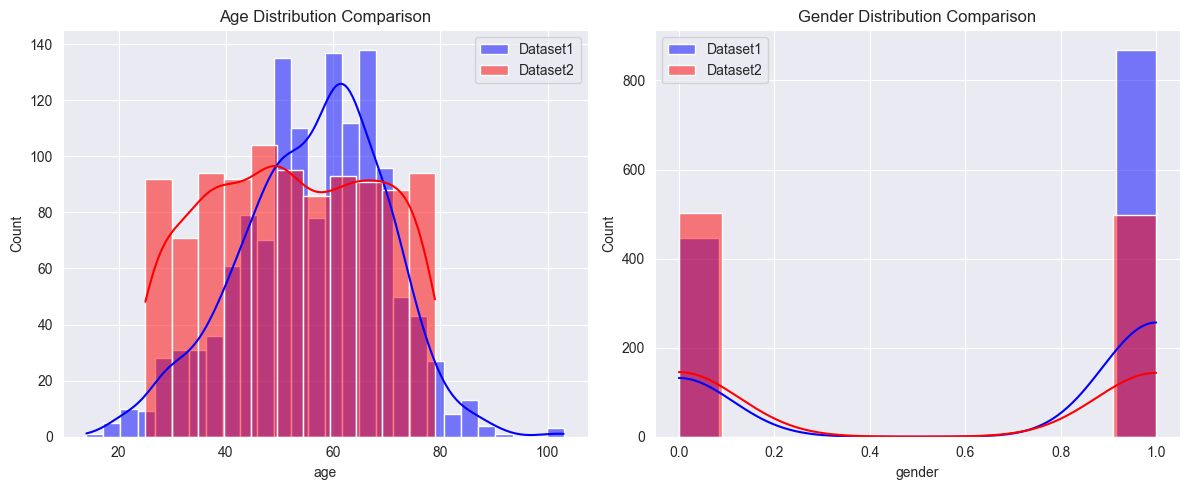

In [6]:
# Compare the distributions of key demographic features (Age and Gender) 
# across both datasets to identify similarities or differences in population structure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(dataset1["age"], kde=True, color="blue", label="Dataset1", ax=axes[0])
sns.histplot(dataset2["age"], kde=True, color="red", label="Dataset2", ax=axes[0])
axes[0].set_title("Age Distribution Comparison")
axes[0].legend()

sns.histplot(dataset1["gender"], kde=True, color="blue", label="Dataset1", ax=axes[1])
sns.histplot(dataset2["gender"], kde=True, color="red", label="Dataset2", ax=axes[1])
axes[1].set_title("Gender Distribution Comparison")
axes[1].legend()

plt.tight_layout()
plt.show()

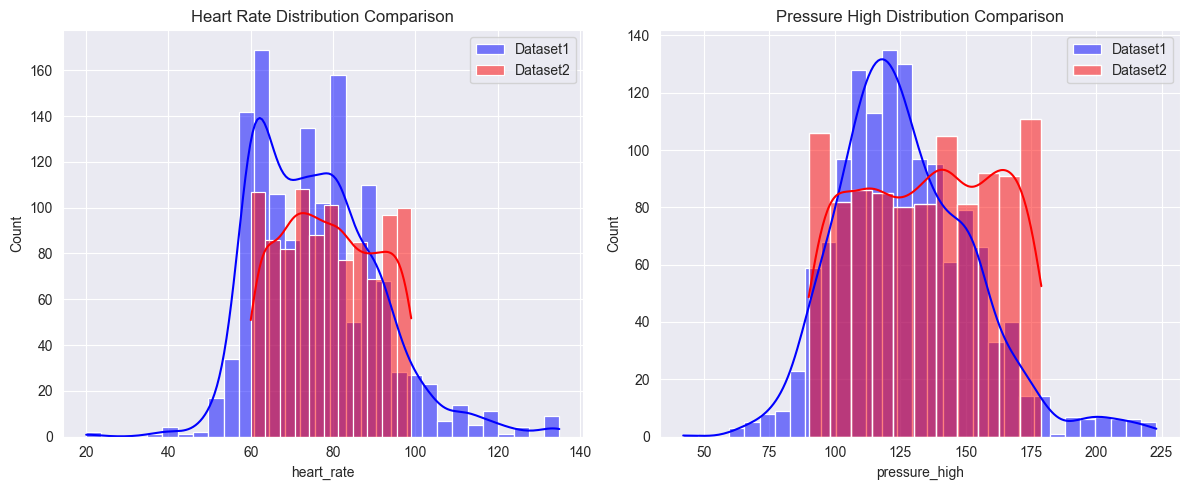

In [7]:
# Compare cardiovascular-related features (Heart Rate and High Blood Pressure) 
# between the two datasets to observe differences in vital health indicators
figure, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(dataset1['heart_rate'], kde=True, color="blue", label="Dataset1", ax=axes[0])
sns.histplot(dataset2['heart_rate'], kde=True, color="red", label="Dataset2", ax=axes[0])
axes[0].set_title("Heart Rate Distribution Comparison")
axes[0].legend()

sns.histplot(dataset1["pressure_high"], kde=True, color="blue", label="Dataset1", ax=axes[1])
sns.histplot(dataset2["pressure_high"], kde=True, color="red", label="Dataset2", ax=axes[1])
axes[1].set_title("Pressure High Distribution Comparison")
axes[1].legend()

plt.tight_layout()
plt.show()

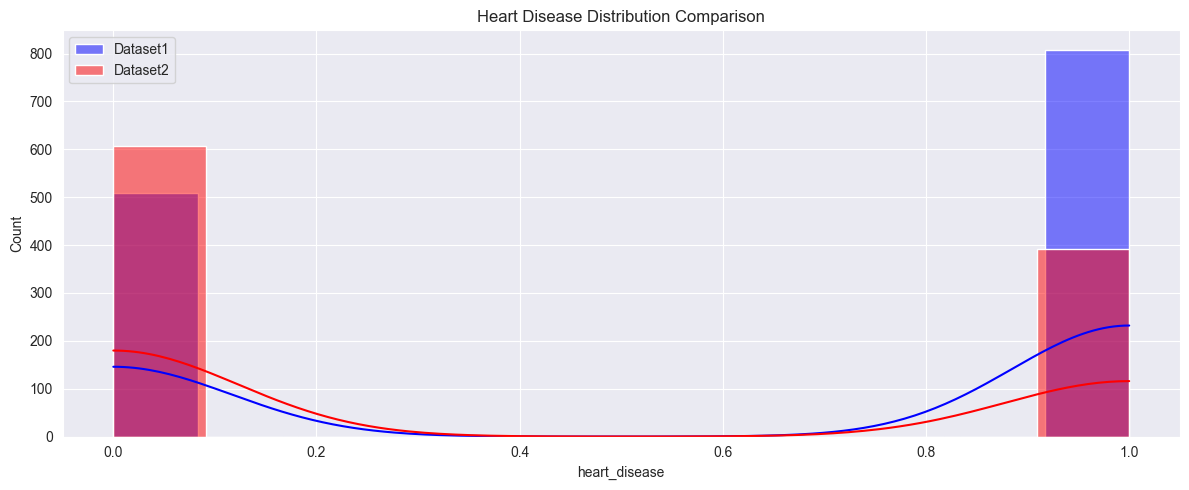

In [8]:
# Compare the target variable (Heart Disease presence) between the two datasets 
# to examine class balance and distribution differences
figure_2, ax = plt.subplots(figsize=(12, 5))

sns.histplot(dataset1["heart_disease"], kde=True, color="blue", label="Dataset1", ax=ax)
sns.histplot(dataset2["heart_disease"], kde=True, color="red", label="Dataset2", ax=ax)

ax.set_title("Heart Disease Distribution Comparison")
ax.legend()

plt.tight_layout()
plt.show()

## II. Statistical Test Results  

This section summarizes the outcomes of the statistical tests performed earlier.  
We highlight which features show significant differences between the two datasets and which remain consistent.  
The goal is to identify variables that may contribute differently to heart disease prediction depending on the dataset.  


#### Shapiro-Wilk Normality Test Results  

Before applying group comparison tests, we first evaluate whether the numerical features follow a normal distribution.  
The **Shapiro-Wilk test** helps determine this:  
- **p > 0.05** → data is consistent with a normal (Gaussian) distribution.  
- **p ≤ 0.05** → data significantly deviates from normality.  

In [9]:
shapiro_ds1 = pd.read_csv('../data/stats_results/shapiro_results_ds1.csv')
shapiro_ds2 = pd.read_csv('../data/stats_results/shapiro_results_ds2.csv')

In [10]:
shapiro_ds1

,Feature,W-Statistic,p-value,Normality
0,heart_rate,0.955,0.0,No (Not Gaussian)
1,pressure_high,0.972,0.0,No (Not Gaussian)
2,pressure_low,0.984,0.0,No (Not Gaussian)
3,glucose,0.785,0.0,No (Not Gaussian)
4,kcm,0.315,0.0,No (Not Gaussian)
5,troponin,0.334,0.0,No (Not Gaussian)


In [11]:
shapiro_ds2

,Feature,W-Statistic,p-value,Normality
0,cholesterol,0.953,0.0,No (Not Gaussian)
1,pressure_high,0.951,0.0,No (Not Gaussian)
2,heart_rate,0.955,0.0,No (Not Gaussian)
3,blood_sugar,0.959,0.0,No (Not Gaussian)


### Interpretation of Shapiro-Wilk Test Results  

The tables above present the results of the Shapiro-Wilk normality test for the numerical features in both datasets.  
This test helps us determine whether the data for each feature follows a **Gaussian (normal) distribution**, which is important for choosing the appropriate statistical methods.  

- **Feature** → The name of the variable being tested.  
- **W-Statistic** → The Shapiro-Wilk test statistic (closer to 1 suggests normality).  
- **p-value** → The probability value indicating if the null hypothesis (data is normally distributed) can be rejected.  
- **Normality** → A simplified interpretation:
  - **Yes (Gaussian)** if *p > 0.05* → we cannot reject normality.  
  - **No (Not Gaussian)** if *p ≤ 0.05* → the feature significantly deviates from normality.  

#### Conclusions:  
Since most features in both datasets **do not follow a normal distribution**, we will use **non-parametric tests** (such as the Mann–Whitney U test) for comparing groups, instead of parametric alternatives like the t-test.  


#### Mann-Whitney U Test Results  

To further investigate the relationship between features and heart disease,  
we apply the **Mann-Whitney U test**, a non-parametric method suitable when data is not normally distributed.  

This test allows us to compare the distributions of each feature between two groups:  
- **Patients without heart disease (0)**  
- **Patients with heart disease (1)**  

By analyzing the p-values, we can identify which features show statistically significant differences between groups,  
highlighting potential risk factors that are more closely associated with heart disease.  


In [12]:
mwu_ds1 = pd.read_csv('../data/stats_results/mannwhitneyu_results_ds1.csv')
mwu_ds2 = pd.read_csv('../data/stats_results/mannwhitneyu_results_ds2.csv')

In [13]:
mwu_ds1

,Feature,p-value,Significant Difference
0,age,0.000,Statistically significant difference between g...
1,heart_rate,0.978,No significant difference between groups
2,pressure_high,0.183,No significant difference between groups
3,pressure_low,0.764,No significant difference between groups
4,glucose,0.477,No significant difference between groups
5,kcm,0.000,Statistically significant difference between g...
6,troponin,0.000,Statistically significant difference between g...


In [14]:
mwu_ds2

,Feature,p-value,Significant Difference
0,age,0.000,Statistically significant difference between g...
1,cholesterol,0.000,Statistically significant difference between g...
2,pressure_high,0.824,No significant difference between groups
3,heart_rate,0.692,No significant difference between groups
4,blood_sugar,0.649,No significant difference between groups


### Conclusion from Mann-Whitney U Test Results  

The statistical comparison between patients with and without heart disease shows the following patterns:  

- **Dataset 1**  
  - Features **age**, **kcm**, and **troponin** demonstrate statistically significant differences between groups (p < 0.05).  
  - This suggests that these variables are strong candidates for distinguishing between patients with and without heart disease.  
  - Other features, such as **heart_rate**, **pressure_high**, **pressure_low**, and **glucose**, do not show significant differences, indicating limited discriminative power in this dataset.  

- **Dataset 2**  
  - Features **age** and **cholesterol** exhibit statistically significant differences between groups.  
  - Variables **pressure_high**, **heart_rate**, and **blood_sugar** do not significantly differ, suggesting they may play a weaker role in predicting heart disease within this dataset.  

#### Key Insight  
Across both datasets, **age** consistently emerges as a statistically significant factor, highlighting its robustness as a risk indicator for heart disease.  
Additional dataset-specific features (**troponin** and **kcm** in Dataset 1, **cholesterol** in Dataset 2) provide unique insights and may reflect differences in how the datasets were collected or the populations studied.  


### Why Shapiro-Wilk and Mann-Whitney Tests Were Used  

By applying the **Shapiro-Wilk test**, we first determined that most features do not follow a normal distribution.  
This justified the use of a **non-parametric approach** for comparing groups.  

The **Mann-Whitney U test** then allowed us to identify which features show statistically significant differences between patients with and without heart disease.  

Through these two steps, we were able to pinpoint the **most relevant features associated with heart disease**, such as:  
- **Age** (significant in both datasets)  
- **Troponin** and **kcm** (significant in Dataset 1)  
- **Cholesterol** (significant in Dataset 2)  

These findings guide the next stage of analysis by highlighting which risk factors are most important for predictive modeling.  
